# Speech Processing Assignment 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries

In [ ]:

import numpy as np
import scipy.io.wavfile
from scipy import signal
import matplotlib.pyplot as plt
import math
import librosa
import IPython.display
import warnings
import cufflinks as cf

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot

import plotly.express as px


warnings.filterwarnings("ignore")

## Using the previously synthesized '\\u\\' 

### Calculate parameters 'a' and 'b' in order to obtain impulse response

In [ ]:
def parameters(F1, B1, Fs):
  sigma_p = np.pi * B1  
  omega_p = 2 *np.pi * F1 

  r = math.exp(-sigma_p/Fs)
  theta = omega_p/Fs

  a = -2*r*np.cos(theta) # defining a new constant a as the term specified here for simple calculation
  b = r*r                # defining a new constant b as the term specified here for simple calculation

  return a,b

### Use the above mentioned 'a' and 'b' to get impulse response for a given number of samples

In [ ]:
def response(input_signal,samples, F1, B1, Fs):
  
  a,b = parameters(F1,B1,Fs)
  
  h = np.zeros([samples,1]) #numpy array for impulse response

  h[0] = input_signal[0]                        #calculating h[0]
  h[1] = -a*h[0]                  #calculating h[1]

  for i in range(2,samples):      #iterating from 2 since we need h[2],h[3],h[4],... and delta[n] = 0 for n > 0 
    h[i] = -a*h[i-1] -b*h[i-2] + input_signal[i]

  return h

### Generating periodic impulse train

In [ ]:
def periodic_triangular_train(time,Fs, Fo):

  Total_samples = int(Fs*time)                                                  # Total samples for which sound will be played

  t = np.linspace(0,time,Total_samples+1)                                        #1 is added so as to take care of 0th sample i.e. sample at t = 0
  t = t[0:Total_samples]                                                         #neglecting the last sample, so that to have a array of size 8000 = time*Fs
  x1 = np.zeros((Total_samples,), dtype = np.float128)                           #To store output

  Total_samples_Fo = int(Fo*time)                                                #Total samples for Fo are calculated here.
                    
  Period_list_time = np.array([i/Fo for i in range(0,Total_samples_Fo + 1)],dtype = np.float128)

  pulse_width = 1/Fs #Taking pulse width equal to 1/Fs so we get atleast a sample while sampling Fo using Fs

  for i in range(0,Total_samples): #iterate over total samples

    for period in Period_list_time:  #take a given period
      
      time_iter = t[i]

      if time_iter > (period - pulse_width/2) and time_iter < (period + pulse_width/2): #if the time instant lies within the width of triangular pulse

        if time_iter <=  (period): #If less, then its value will be as per positive slope
          x1[i] = (time_iter - (period - pulse_width/2)) / (pulse_width/2)        
        elif time_iter >  (period): #if more, then its value will be as per negative slope
          x1[i] = -(time_iter - (period + pulse_width/2)) / (pulse_width/2)

  x2 = np.where(x1!=0,1,0)

  return t,x2

### Obtaining Vowel \\u\\ using all the functions above

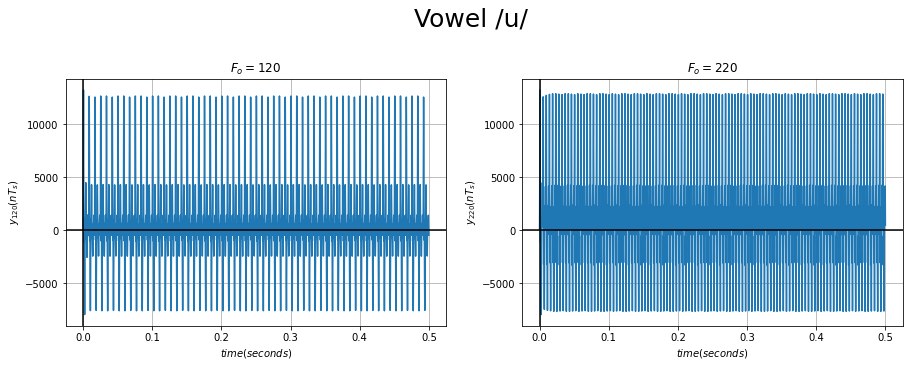

In [ ]:
F1 = 300
F2 = 870
F3 = 2240

B = 100

Fs = 16000

time_T = 0.5 #Time can be changed by changing the value here
Total_samples = int(time_T*Fs)
Gain = 100

delta = signal.unit_impulse(Total_samples, 0)
h1=response(delta,Total_samples,F1,B,Fs)
h2=response(delta,Total_samples,F2,B,Fs)
h3=response(delta,Total_samples,F3,B,Fs)

h12 = signal.convolve(h1,h2)
h = signal.convolve(h12,h3)

Fo1 = 120
Fo2 = 220

t,x1 = periodic_triangular_train(time_T,Fs,Fo1)
t,x2 = periodic_triangular_train(time_T,Fs,Fo2)

yA_3 = Gain*signal.convolve(h[0:Total_samples],x1.reshape((Total_samples,1)))[0:Total_samples]
yB_3 = Gain*signal.convolve(h[0:Total_samples],x2.reshape((Total_samples,1)))[0:Total_samples]


figure= plt.figure(figsize = [15,10])

figure.suptitle("Vowel /u/",fontsize = 25)
figure.add_subplot(2,2,1)

plt.plot(t,yA_3)
plt.title("$F_{o} = 120$")
plt.ylabel("$y_{120}(nT_{s})$")
plt.xlabel("$time (seconds)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()

figure.add_subplot(2,2,2)

plt.plot(t,yB_3)
plt.title("$F_{o} = 220$")
plt.ylabel("$y_{220}(nT_{s})$")
plt.xlabel("$time (seconds)$")
plt.axvline(color = "black")
plt.axhline(color = "black")
plt.grid()
plt.show()

scipy.io.wavfile.write("Q4_C_Fo_120.wav",Fs,yA_3.astype(np.int16))
scipy.io.wavfile.write("Q4_C_Fo_220.wav",Fs,yB_3.astype(np.int16))


In [ ]:
IPython.display.Audio("Q4_C_Fo_120.wav")

In [ ]:
IPython.display.Audio("Q4_C_Fo_220.wav")

In [ ]:
#Audio Recording from the teams folder

IPython.display.Audio(r"/content/drive/MyDrive/213070002_Speech_Assign2/u_F0-120_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav")

In [ ]:
IPython.display.Audio(r"/content/drive/MyDrive/213070002_Speech_Assign2/u_F0-220_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav")

Note : If this code block throws error, comment out the block and run

In [ ]:
#Since both the sounds sound very similar, using the sound given in team's folder here

path1 = r"/content/drive/MyDrive/213070002_Speech_Assign2/u_F0-120_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav"
path2 = r"/content/drive/MyDrive/213070002_Speech_Assign2/u_F0-220_F1-300F2-870F3-2240_B1-50B2B3-100_Fs16k.wav"


sr,yA_3 = scipy.io.wavfile.read(path1)
sr,yB_3 = scipy.io.wavfile.read(path2)


##DFT calculation after applying suitable windows

### Function for calculating Hamming window

In [ ]:
#This function takes in sampling frequency and window duration, and yeilds Hamming window along with appropriate time axis

def get_window(Fs,duration):
  Window_samples = int(duration*Fs)
  n = np.linspace(-duration/2,duration/2,Window_samples) 
  Hamming = np.hamming(Window_samples)
  Hamming = Hamming.reshape((Hamming.shape[0],1))
  return n, Hamming

### Function for calculating rectangular window

In [ ]:
#This function takes in sampling frequency and window duration, and yeilds Hamming window along with appropriate time axis

def get_window_rect(Fs,duration):
  Window_samples = int(duration*Fs)
  n = np.linspace(-duration/2,duration/2,Window_samples) 
  Rectangular = np.ones((Window_samples,1))
  Rectangular = Rectangular.reshape((Rectangular.shape[0],1))
  return n, Rectangular


### Obtaining the various windows as per the duration. Hamming window as well as Rectangular window.

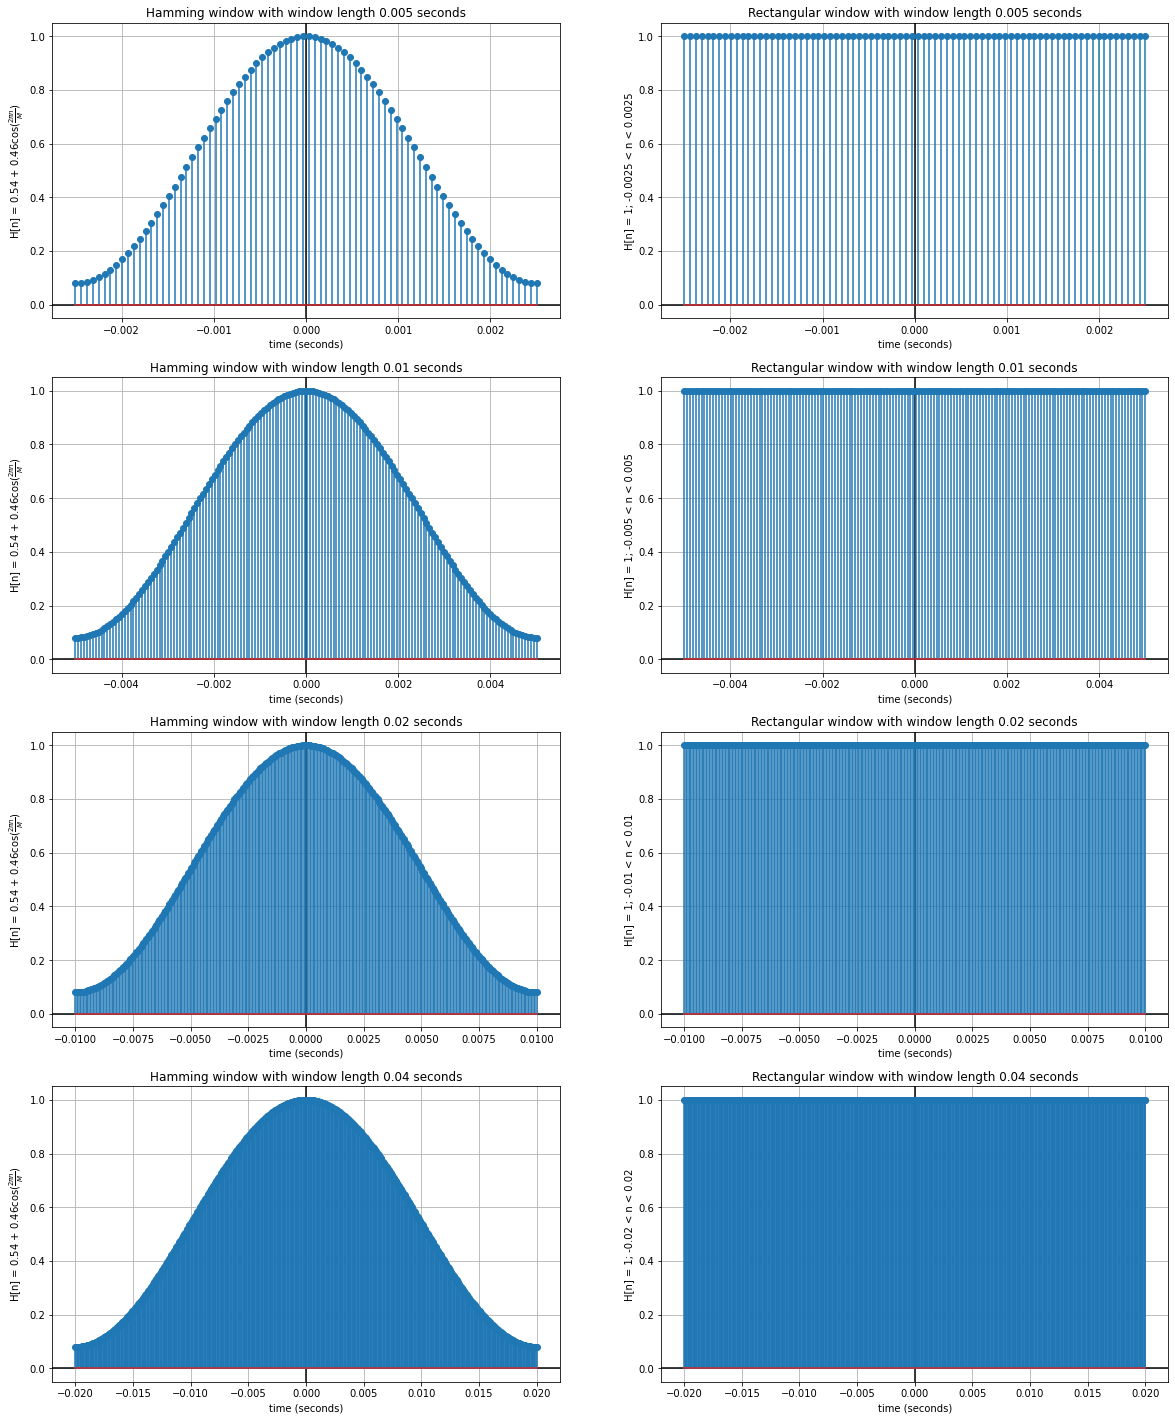

In [ ]:
Fs = 16000

signal_duration = 0.5
t = np.arange(0,signal_duration + 1/Fs,Fs)

n1,W1 = get_window(Fs, 0.005)
n1,W1_r = get_window_rect(Fs, 0.005)

n2,W2 = get_window(Fs, 0.01)
n2,W2_r = get_window_rect(Fs, 0.01)

n3,W3 = get_window(Fs, 0.02)
n3,W3_r = get_window_rect(Fs, 0.02)

n4,W4 = get_window(Fs, 0.04)
n4,W4_r = get_window_rect(Fs, 0.04)


figure = plt.figure(figsize = [20,25])
figure.add_subplot(4,2,1)
plt.title("Hamming window with window length {} seconds".format(0.005))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 0.54 + 0.46cos($\\frac{2 \pi n}{M}$)")
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n1,W1)

figure.add_subplot(4,2,2)
plt.title("Rectangular window with window length {} seconds".format(0.005))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 1; {} < n < {}".format(-0.005/2,0.005/2))
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n1,W1_r)

figure.add_subplot(4,2,3)
plt.title("Hamming window with window length {} seconds".format(0.01))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 0.54 + 0.46cos($\\frac{2 \pi n}{M}$)")
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n2,W2)

figure.add_subplot(4,2,4)
plt.title("Rectangular window with window length {} seconds".format(0.01))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 1; {} < n < {}".format(-0.01/2,0.01/2))
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n2,W2_r)

figure.add_subplot(4,2,5)
plt.title("Hamming window with window length {} seconds".format(0.02))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 0.54 + 0.46cos($\\frac{2 \pi n}{M}$)")
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n3,W3)

figure.add_subplot(4,2,6)
plt.title("Rectangular window with window length {} seconds".format(0.02))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 1; {} < n < {}".format(-0.02/2,0.02/2))
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n3,W3_r)

figure.add_subplot(4,2,7)
plt.title("Hamming window with window length {} seconds".format(0.04))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 0.54 + 0.46cos($\\frac{2 \pi n}{M}$)")
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n4,W4)

figure.add_subplot(4,2,8)
plt.title("Rectangular window with window length {} seconds".format(0.04))
plt.xlabel("time (seconds)")
plt.ylabel("H[n] = 1; {} < n < {}".format(-0.04/2,0.04/2))
plt.axhline(color = "black")
plt.axvline(color = "black")
plt.grid()
plt.stem(n4,W4_r)

plt.show()


### Window multiplication with original signal

In [ ]:
def DFT(extracted,Fs):

  N_Point_DFT = 1024 #1024 point DFT

  extracted_padded = np.concatenate((extracted,np.zeros((N_Point_DFT - extracted.shape[0],1))),axis = 0)

  DFT_W = (np.fft.fft(extracted_padded,axis = 0))
  f = np.linspace(0,Fs,extracted_padded.shape[0])
  return f, DFT_W

In [ ]:
def extraction(W,n_w,signal_duration,Fs,y):

  #Extracting the signal from the center by multiplying it with the center of the original signal
  #The function returns time axis and the extracted signal for a particular window

  center = int(signal_duration*Fs // 2)
  
  extracted = np.zeros((W.shape[0],1))

  for i in range(0,W.shape[0]):
    extracted[i] = W[i] * y[int(center + i)]

  n = n_w + signal_duration/2 + W.shape[0]/Fs
  
  return n,extracted 


In [ ]:
def plot_DFT(W,W_r,n_w,signal_duration,Fs,y):

  #Extracting the signal using hamming and rectangular window

  n,extracted_h = extraction(W,n_w,signal_duration,Fs,y)
  n,extracted_r = extraction(W_r,n_w,signal_duration,Fs,y)

  #Calculating the 1024 point DFT by padding the extracted signals. 
  f,extracted_padded_h = DFT(extracted_h,Fs)
  f,extracted_padded_r = DFT(extracted_r,Fs) 

  #Finding the magnitude in Decibels
  Mag_h = 20*np.log10(np.abs(extracted_padded_h))
  Mag_r = 20*np.log10(np.abs(extracted_padded_r))

  #Plotting all the plots
  figure = plt.figure(figsize = [20,15])
  
  figure.add_subplot(2,2,1)
  
  plt.title("Hamming Window extraction")
  plt.xlabel("time (seconds)")
  plt.ylabel("x[n]*w[m-n]")
  plt.axhline(color = "black")
  plt.grid()
  plt.plot(n,extracted_h)

  figure.add_subplot(2,2,2)   
  plt.title("DFT for the extracted Hamming Window")
  plt.xlim(0,Fs/2)
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("20log(|F($\omega$)|) (dB)")
  plt.axvline(color = "black")
  plt.grid()
  plt.plot(f,Mag_h)

  figure.add_subplot(2,2,3)
  plt.title("Rectangular Window extraction")
  plt.xlabel("time (seconds)")
  plt.ylabel("x[n]*w[m-n]")
  plt.axhline(color = "black")
  plt.plot(n,extracted_r)
  plt.grid()

  figure.add_subplot(2,2,4)
  plt.title("DFT for the extracted Rectangular Window")
  plt.xlabel("Frequency (Hz)")
  plt.ylabel("20log(|F($\omega$)|) (dB)")
  plt.axvline(color = "black")
  plt.plot(f,Mag_r)
  plt.xlim(0,Fs/2)
  plt.grid()

  
  plt.show()

  #returns parameters of frequency spectrum for analysis
  return f, Mag_h, Mag_r


In [ ]:
#This function is used for analysis purpose
#It plots interactive plot, thus very much helpful in estimating frequencies

def analyse_DFT(f,Mag_h,Mag_r):

  fig1 = px.line(x=f[0:f.shape[0]//2],y=Mag_h[0:f.shape[0]//2],labels = {"x" : "Frequency (Hz)", "y" : "Magnitude (dB)"},title = "Hamming window analysis",)
  fig1.show()

  fig2 = px.line(x=f[0:f.shape[0]//2],y=Mag_r[0:f.shape[0]//2],labels = {"x" : "Frequency (Hz)", "y" : "Magnitude (dB)"},title = "Rectangular window analysis")
  fig2.show()



# Assignment 1B from here

## For Pitch = 120 Hz

Note : The errors are calculated in the analysis section whereas similarities and differences between the various plots are mentioned after the final 220 Hz and 40 ms window size plot

### 5 ms Hamming and Rectangular window 

#### Plots

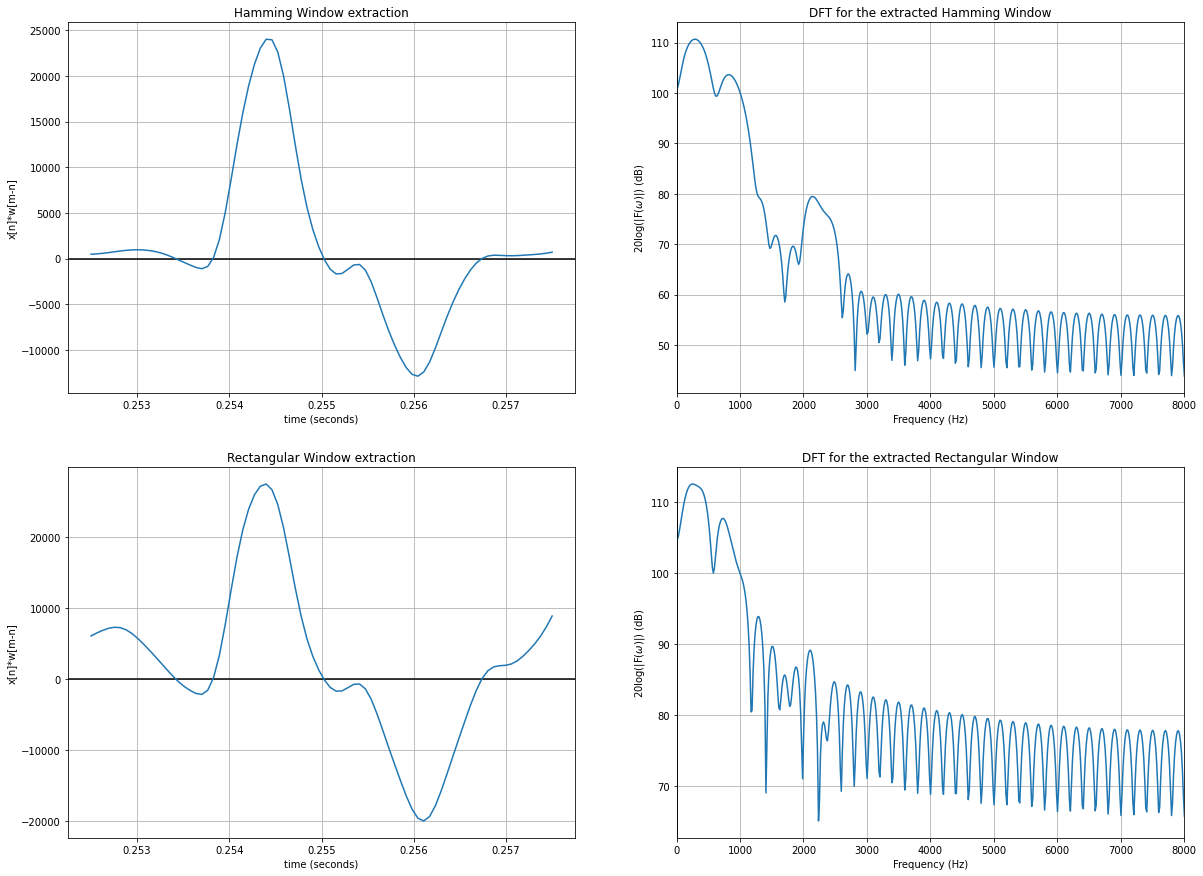

In [ ]:
f1, Mag_h1, Mag_r1 = plot_DFT(W1,W1_r,n1,signal_duration,Fs,yA_3)

#### Analysis 

In [ ]:
analyse_DFT(f1,Mag_h1,Mag_r1)

Parameters from Hamming window :

Pitch : Difficult to estimate due to smearing of spectrum in both cases,
1000/2 = 500 (Far off from original pitch)

F1 : 281.52

F2 : 813.29

F3 : 2142.717

------------------------------------------------------------------------

Parameters from Rectangular window : 

Pitch : Difficult to estimate due to smearing of spectrum in both cases,
1000/2 = 500 (Far off from original pitch)

F1 : 250.244

F2 : 735.09

F3 : 2111.437

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 380

First Formant error : 18.48

Second Formant error : 56.71

Third Formant error : 97.283

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 380

First Formant error : 49.756

Second Formant error : 134.91

Third Formant error : 128.563


### 10 ms Hamming and Rectangular window 

#### Plots

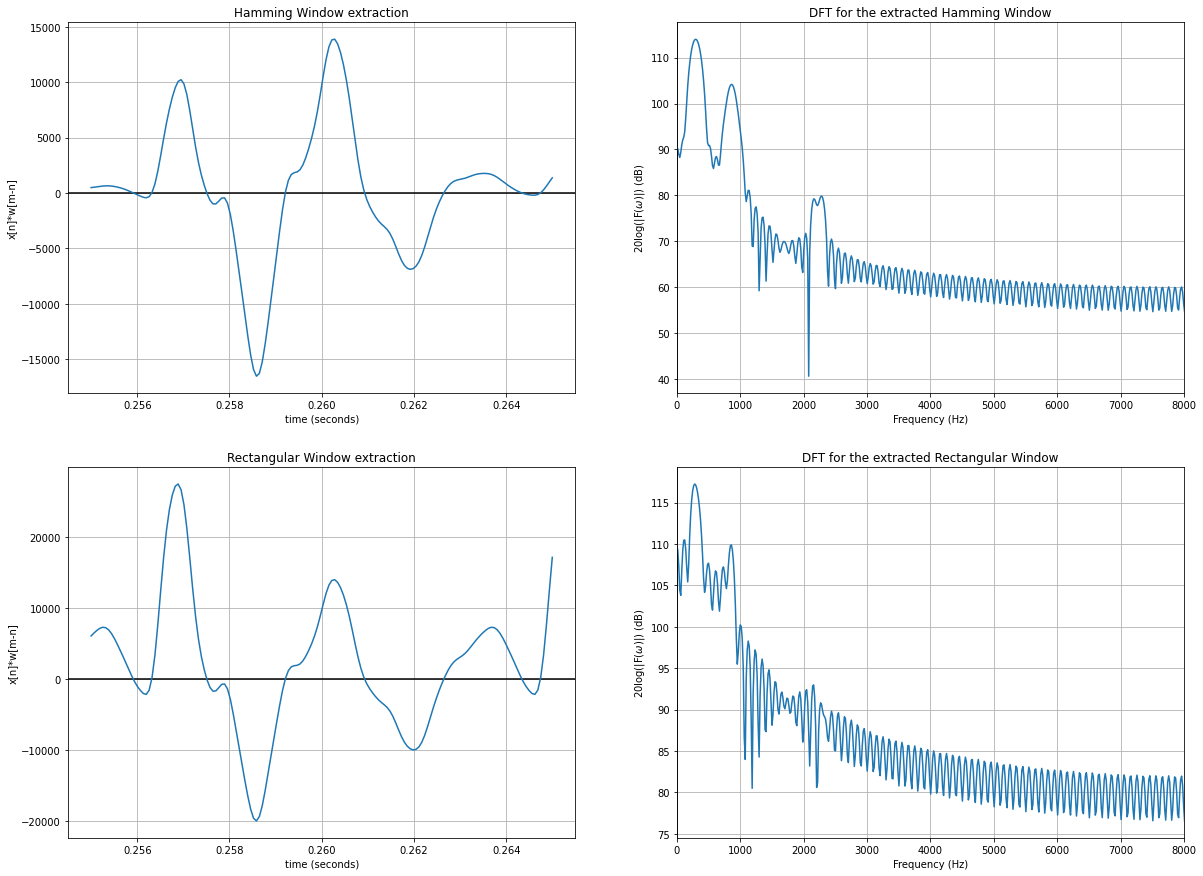

In [ ]:
f2, Mag_h2, Mag_r2 = plot_DFT(W2,W2_r,n2,signal_duration,Fs,yA_3)

#### Analysis

In [ ]:
analyse_DFT(f2, Mag_h2, Mag_r2)

Parameters from Hamming window :

Pitch : 3 peaks visible so 1000/3 = 333.33

F1 : 297.1652 Hz

F2 : 860.21 Hz

F3 : 2283.48 Hz

Parameters from Rectangular window : 

Pitch : 6 peaks visible so 1000/6 = 166.66

F1 : 281.52 Hz

F2 : 860.21 Hz

F3 : 2158.358 Hz

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 213.33

First Formant error : 2.8348

Second Formant error : 9.79

Third Formant error : 43.48

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 46.66

First Formant error : 18.48

Second Formant error : 9.79

Third Formant error : 81.642


### 20 ms Hamming and Rectangular window 

#### Plots

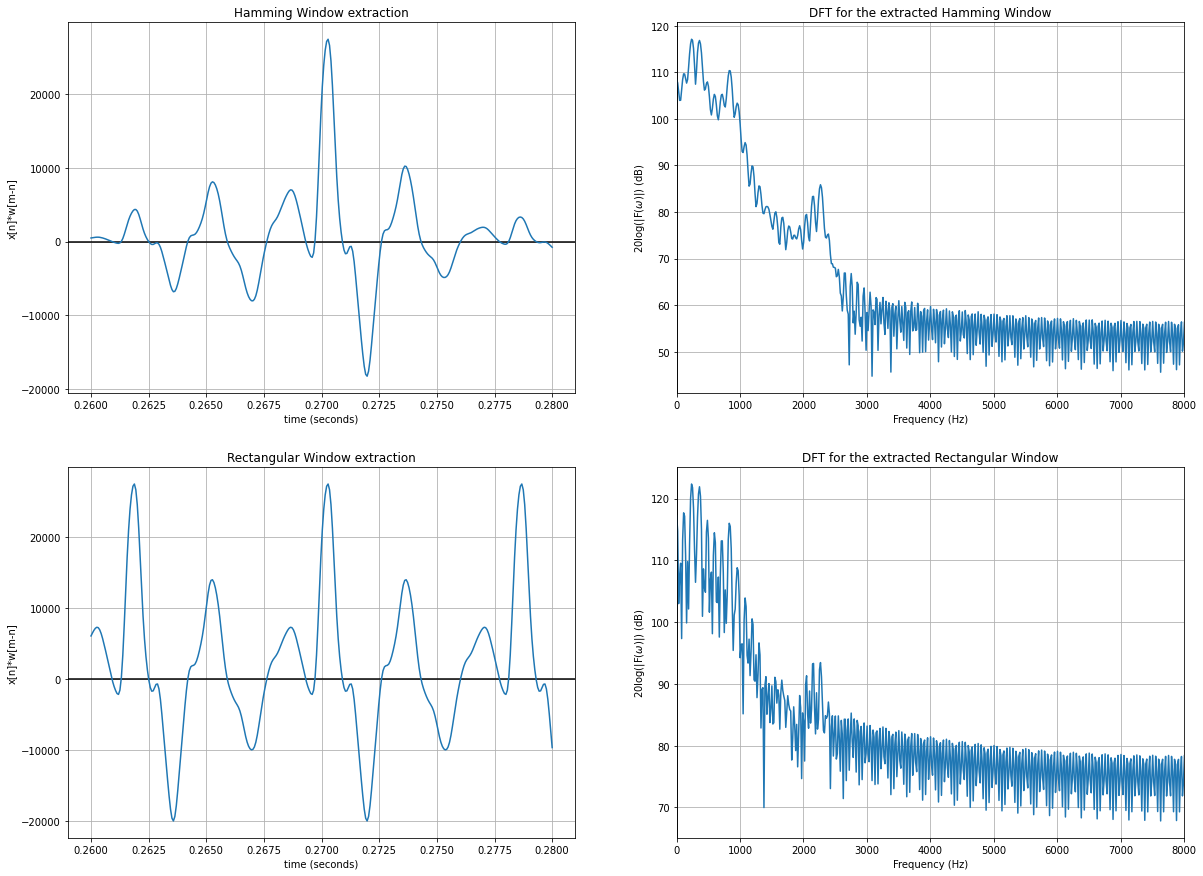

In [ ]:
f3, Mag_h3, Mag_r3 = plot_DFT(W3,W3_r,n3,signal_duration,Fs,yA_3)

#### Analysis

In [ ]:
analyse_DFT(f3, Mag_h3, Mag_r3)

Parameters from Hamming window :

Pitch : 1000/8 = 125 Hz (1kHz contains 8 frequency lobes)

F1 : 234.6 Hz

F2 : 828.93 Hz

F3 : 2267.84 Hz

Parameters from Rectangular window : 

Pitch : 1000/8 = 125 Hz

F1 : 234.6 Hz

F2 : 828.93 Hz

F3 : 2267.84 Hz

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 5

First Formant error : 65.4

Second Formant error : 41.07

Third Formant error : 27.84

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 5

First Formant error : 65.4

Second Formant error : 41.07

Third Formant error : 27.84


### 40 ms Hamming and Rectangular window 

#### Plots

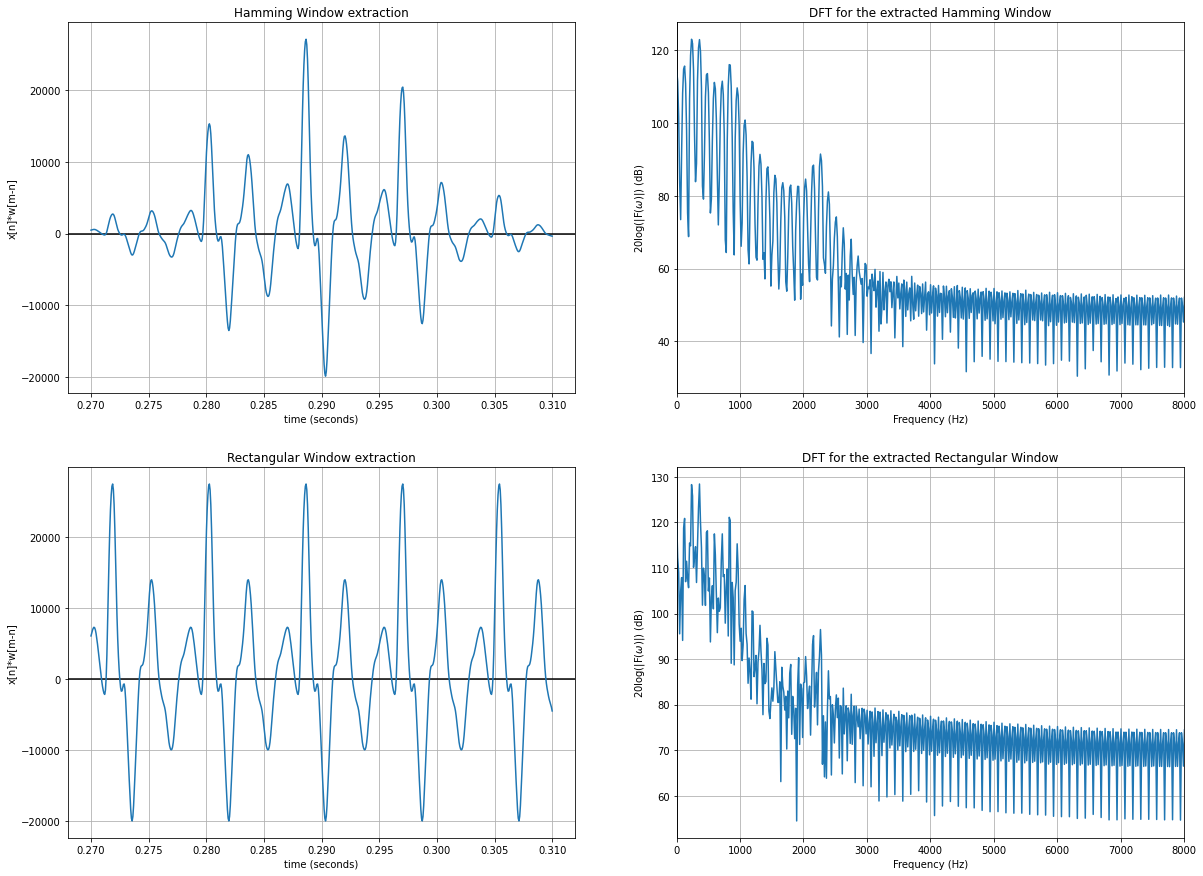

In [ ]:
f4, Mag_h4, Mag_r4 = plot_DFT(W4,W4_r,n4,signal_duration,Fs,yA_3)

#### Analysis

In [ ]:
analyse_DFT(f4, Mag_h4, Mag_r4)

Parameters from Hamming window :

Pitch : 1000 / 8 = 125 Hz

F1 : 234.6 Hz

F2 : 828.93 Hz

F3 : 2267.84 Hz

Parameters from Rectangular window : 

Pitch : 1000/8 = 125 Hz

F1 : 234.6 Hz

F2 : 844.57 Hz

F3 : 2267.84 Hz

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 5

First Formant error : 65.4

Second Formant error : 41.07

Third Formant error : 27.84

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 5

First Formant error : 65.4

Second Formant error : 25.43

Third Formant error : 27.84


##For Pitch = 220 Hz

### 5 ms Hamming and Rectangular window 

#### Plots

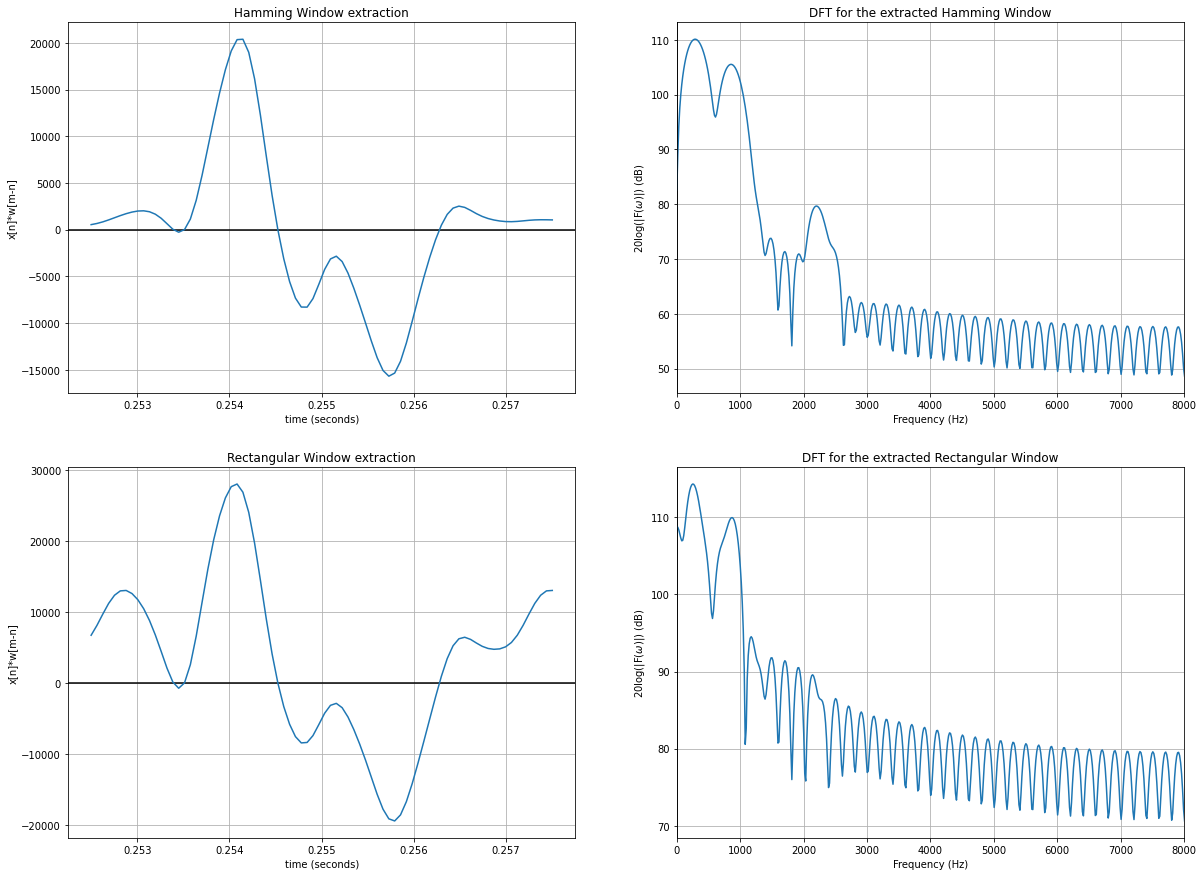

In [ ]:
f1, Mag_h1, Mag_r1 = plot_DFT(W1,W1_r,n1,signal_duration,Fs,yB_3)

#### Analysis

In [ ]:
analyse_DFT(f1, Mag_h1, Mag_r1)

Parameters from Hamming window :

Pitch : Difficult due to narrowband spectrum, 1000/2 = 500 Hz

F1 : 297.16 Hz

F2 : 860.215 Hz

F3 : 2205.279 Hz

Parameters from Rectangular window : 

Pitch : Difficult due to narrowband spectrum, 1000/2 = 500 Hz

F1 : 250.244 Hz

F2 : 875.85 Hz

F3 : 1173.021 Hz (Limitation of Rectangular window, Side lobe appears as if it is a formant itself)

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 280

First Formant error : 2.84

Second Formant error : 9.785

Third Formant error : 34.721

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 280

First Formant error : 49.756

Second Formant error : 5.85

Third Formant error : 1066.979 (Due to raised sidelobe)


### 10 ms Hamming and Rectangular window 

#### Plots

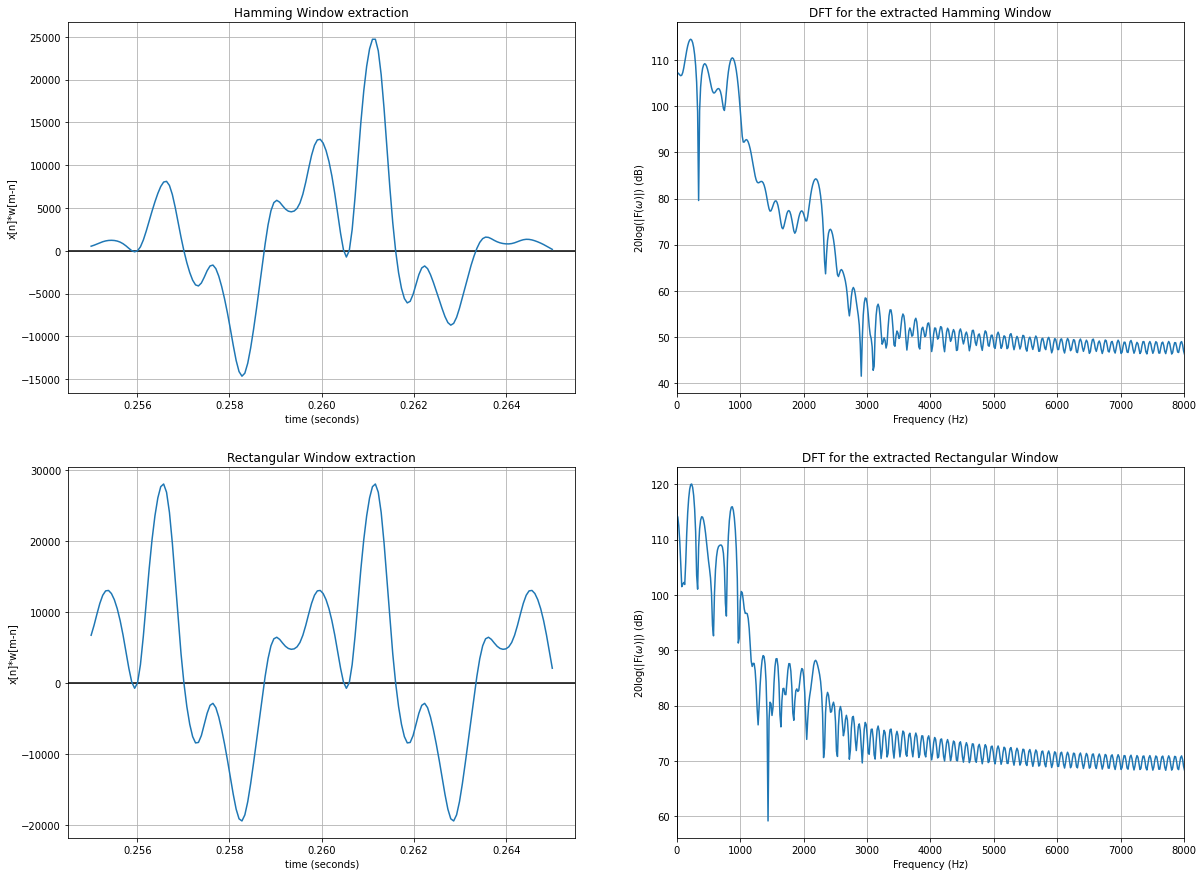

In [ ]:
f2, Mag_h2, Mag_r2 = plot_DFT(W2,W2_r,n2,signal_duration,Fs,yB_3)

#### Analysis

In [ ]:
analyse_DFT(f2, Mag_h2, Mag_r2)

Parameters from Hamming window :

Pitch : 1000/4 = 250 Hz

F1 : 218.96 Hz

F2 : 875.85 Hz

F3 : 2189.638 Hz

Parameters from Rectangular window : 

Pitch : 1000/4 = 250 Hz

F1 : 218.96 Hz

F2 : 875.85 Hz

F3 : 2189.638 Hz

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 30 Hz

First Formant error : 81.04 

Second Formant error : 5.85

Third Formant error : 50.362

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 30 Hz

First Formant error : 81.04

Second Formant error : 5.85

Third Formant error : 50.362


### 20 ms Hamming and Rectangular window 

#### Plots

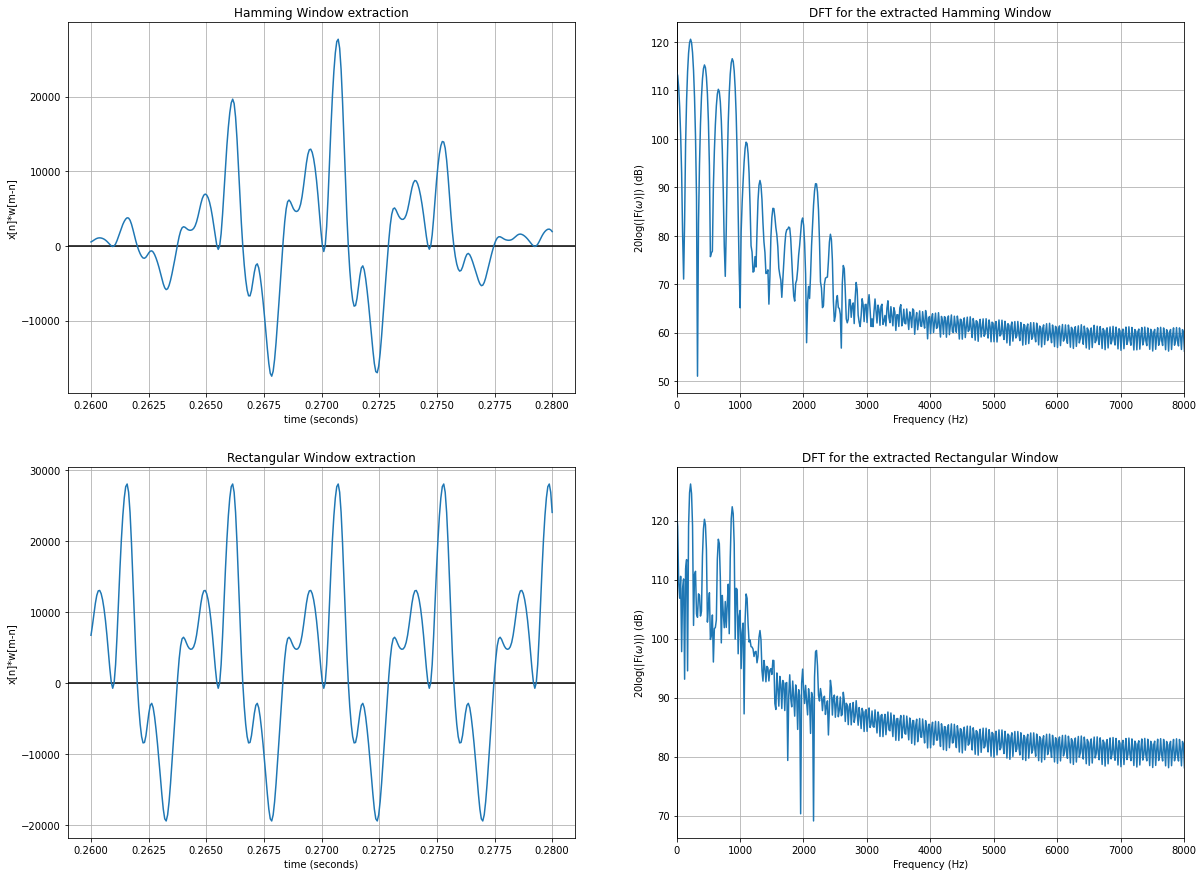

In [ ]:
f3, Mag_h3, Mag_r3 = plot_DFT(W3,W3_r,n3,signal_duration,Fs,yB_3)

#### Analysis

In [ ]:
analyse_DFT(f3, Mag_h3, Mag_r3)

Parameters from Hamming window :

Pitch : 1000/4 = 250 Hz

F1 : 218.96 Hz

F2 : 875.85 Hz

F3 : 2189.638 Hz

Parameters from Rectangular window : 

Pitch : 1000/4 = 250 Hz

F1 : 218.96 Hz

F2 : 875.85 Hz

F3 : 2189.638 Hz

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 30 Hz

First Formant error : 81.04 

Second Formant error : 5.85

Third Formant error : 50.362

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 30 Hz

First Formant error : 81.04

Second Formant error : 5.85

Third Formant error : 50.362


### 40 ms Hamming and Rectangular window 

#### Plots

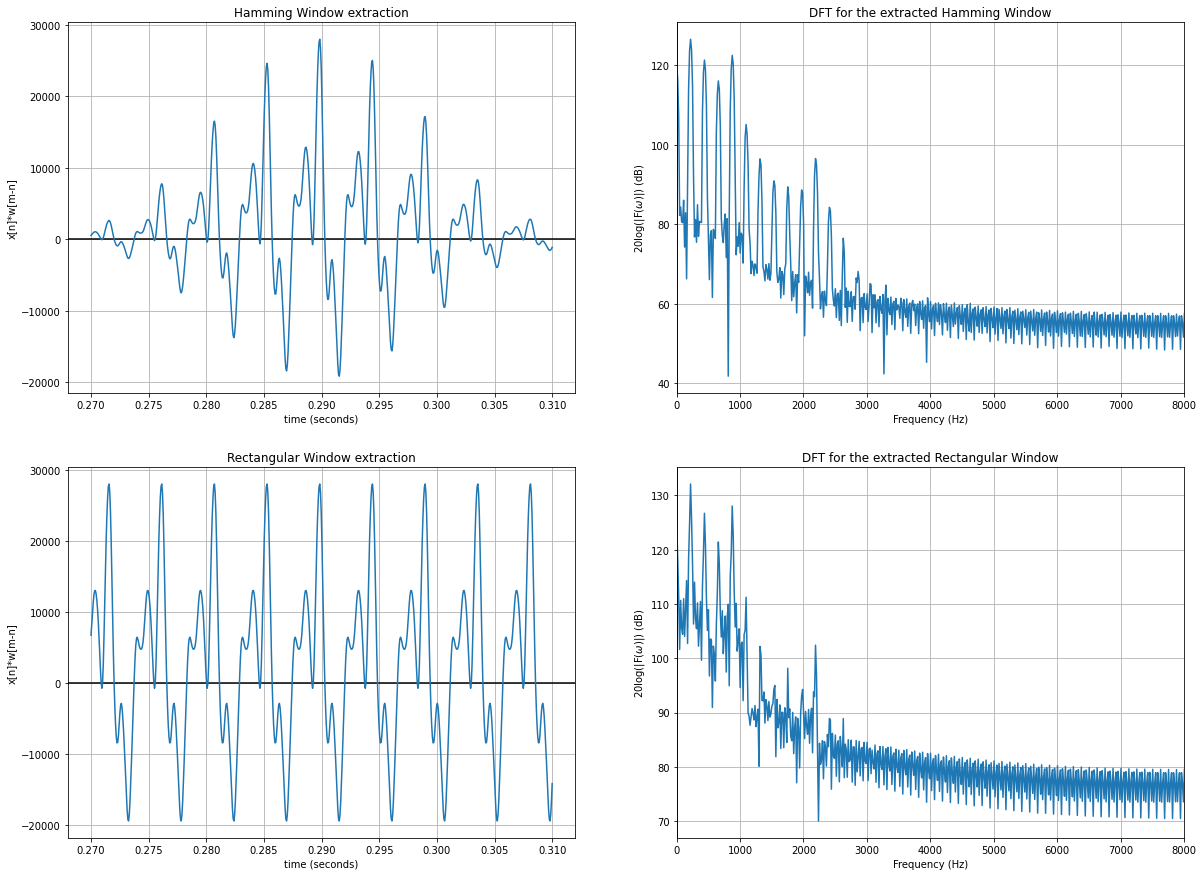

In [ ]:
f4, Mag_h4, Mag_r4 = plot_DFT(W4,W4_r,n4,signal_duration,Fs,yB_3)

#### Analysis

In [ ]:
analyse_DFT(f4, Mag_h4, Mag_r4)

Parameters from Hamming window :

Pitch : 1000/4 = 250 Hz

F1 : 218.96 Hz

F2 : 875.85 Hz

F3 : 2189.638 Hz

Parameters from Rectangular window : 

Pitch : 1000/4 = 250 Hz

F1 : 218.96 Hz

F2 : 875.85 Hz

F3 : 2189.638 Hz

------------------------------------------------------------------------

Error Hamming : 

Pitch error : 30 Hz

First Formant error : 81.04 

Second Formant error : 5.85

Third Formant error : 50.362

------------------------------------------------------------------------

Error Rectangular : 

Pitch error : 30 Hz

First Formant error : 81.04

Second Formant error : 5.85

Third Formant error : 50.362

## Similarities and Differences

## For Wideband Spectrums :

### Difference between the two spectra : 



In wideband analysis using rectangular window, there might be a situation where the sidelobe can be larger in magnitude compared to other formant, this is not the case in Hamming window

### Similarity between the two spectra : 

Both observe spectrum smearing for less window size due to broadening of the central lobe (More in Hamming compared to rectangular), Wideband spectrum can be used here to detect the formants.

------------------------------------------------------------------------

## For Narrowband spectrums : 

### Difference between the two spectra :

The sidelobes are supressed much more in hamming window compared to the rectangular window. For the narrowband analysis, the harmonics of fundamental frequency Fo can be visualised.


### Similarity between the two spectra : 


The pitch estimation can be done with these two spectrums due to narrowband characteristic (Larger window size).





## Conclusion

We can see that windows with size 5 ms and 10 ms are smaller compared to 20 ms and 40 ms window sizes. Hence, as evident from the spectrum, the first two windows are used to visualize wideband spectrum whereaas the other two spectrums are called narrowband spectrum. 

Parameters extracted from Wideband spectrum = Formants
Parameters extracted from Narrowband spectrum = Pitch estimation

Rectangular Windows have smaller bandwidth compared to Hamming window of the same duration, but the sidelobes are not as attenuated as they should be, as evident from the spectrums.